**YOUR NAME**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3b: Polynomial Regression

In [2]:
import os
import random
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/var/folders/6f/dm144scx07v5d58z86sjmsxw0000gn/T/ipykernel_6059/947926173.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/6f/dm144scx07v5d58z86sjmsxw0000gn/T/ipykernel_6059/947926173.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


## Task 1: Import  datasets

1. Import training ('data/lab3b-400-training.csv') and testing ('data/lab3b-100-testing.csv') datasets into separate matrices using [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.  We will only be using y1.
3. Print the first 5 rows of each dataset.
4. Plot your dataset, column x and y1, with a title and axis labeled. 

In [3]:
data4=np.genfromtxt ("data/lab3b-400-training.csv", delimiter=",", skip_header=2)   
data1=np.genfromtxt ("data/lab3b-100-testing.csv", delimiter=",", skip_header=2)   

# data4=data4[:,:2]
# data1=data1[:,:2]

print("Training dataset [A] first 5 rows:\n",data4[:5])
print("Training dataset [AT] first 5 rows:\n",data1[:5])



print('''
--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

Training dataset [A] first 5 rows:
 [[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Training dataset [AT] first 5 rows:
 [[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]

--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0

## Task 2. 3 dimensional polynomial regression

### 2a. Make 3 polynomial matrices

$$
\left(\begin{array}{cccc} 
1 & x_0^1 & x_0^2 & x_0^3\\
1 & x_1^1 & x_1^2 & x_1^3\\
1 & x_2^1 & x_2^2 & x_2^3\\
1 & x_3^1 & x_3^2 & x_3^3\\
1 & x_4^1 & x_4^2 & x_4^3\\
... & ... & ... & ...\\
1 & x_n^1 & x_n^2 & x_n^3\\
\end{array}\right)
$$ 

1. Make a polynomial matrix for the training dataset using the independent variable
    * Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `Ap`, with the same number of rows as the training dataset and 4 columns
    * Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    * Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    * Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `ATp`, with the same number of rows as the test dataset and 4 columns
    * Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    * Print the first 5 rows of the matrix
3. Make a polynomial matrix to graph the prediction line
    * For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), `line_x`, from the range of the test dataset's x column with 100 steps
    * Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `lineM_x`, with the same number of rows as the length of `line_x` and 4 columns
    * Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    * Print the first 5 rows of the matrix

In [4]:
Ap=np.ones((data4.shape[0], 4))
holder=np.copy(data4)
Ap[:,1]=holder[:,0]
Ap[:,2]=holder[:,0]**2
Ap[:,3]=holder[:,0]**3
print(Ap[:5,])

[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]


In [5]:
ATp=np.ones((data1.shape[0], 4))
holder=np.copy(data1)
ATp[:,1]=holder[:,0]
ATp[:,2]=holder[:,0]**2
ATp[:,3]=holder[:,0]**3
print(ATp[:5,])

[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]


In [6]:
line_x=np.linspace(data1[:,0].min(), data1[:,0].max(), 100)
lineM_x=np.ones((line_x.shape[0],4))
lineM_x[:,1]=line_x
lineM_x[:,2]=line_x**2
lineM_x[:,3]=line_x**3
print(lineM_x[:5,])


# xline = np.linspace(data1[:,0].min(),data1[:,0].max(), len(data1)).reshape((len(data1),1) )
# xHat = np.hstack((np.ones((len(data1),1)),xline,xline**2, xline**3))
# print(xHat[:5])


[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]


In [7]:
print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]
''')


--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]



### 2b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable `y1`. 
2.  Calculate and print the $R^2$ value.
    

In [19]:
import scipy
y = data4[:,1]

c, sumresidualssquared, rank, _ = scipy.linalg.lstsq(Ap, y)
# residuals = y - lineM_x @ c
r2 = 1 - sumresidualssquared/ np.sum((y - np.mean(y))**2)
print("c: ",c)
print("residuals: ",sumresidualssquared )
print("rank: ", rank)
print("r-squared: ",r2 )


c:  [-0.15511 -0.96979 -0.24675  1.61541]
residuals:  136.56714157926723
rank:  4
r-squared:  0.11595609001119211


In [9]:
print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')


--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



### 2c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply `ATp` with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it the dependent variable `y1`.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression

2. Print the $R^2$ for the test dataset

In [20]:
yhat = ATp @ c
#y1 = data1[:,1].reshape(predictY.shape[0],1)
y1 = data1[:,1]
residuals = yhat-y1
R2 = 1 - np.sum((y1-yhat)**2) / np.sum((y1 - np.mean(y1))**2)
print('r2 test: ', R2)

r2 test:  0.4431027176546437


for some reason below code no work

In [15]:
# import scipy
# y1 = data1[:,1]

# ___, sumresidualssquared, rank, _ = scipy.linalg.lstsq(ATp, y1)
# print(sumresidualssquared)
# # residuals = y - lineM_x @ c
# r2 = 1 - sumresidualssquared/ np.sum((y1 - np.mean(y1))**2)
# print("c: ",c)
# print("residuals: ",sumresidualssquared )
# print("rank: ", rank)
# print("r-squared: ",r2 )

16.772107975846698
c:  [-0.15511 -0.96979 -0.24675  1.61541]
residuals:  16.772107975846698
rank:  4
r-squared:  0.8271282609551933


In [12]:
print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')


--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### Task 3) Visualize the Results
In one plot:
1. Graph the training data as a scatter plot.
1. Graph the test dataset as a scatter plot.
1. Graph the prediction line
    1. the independent variable is line_x
    2. the dependent variable is lineM_x multiplied with the weights for the independent variable.
1. Include a title (with the two $R^2$ values), axis labels, and a legend

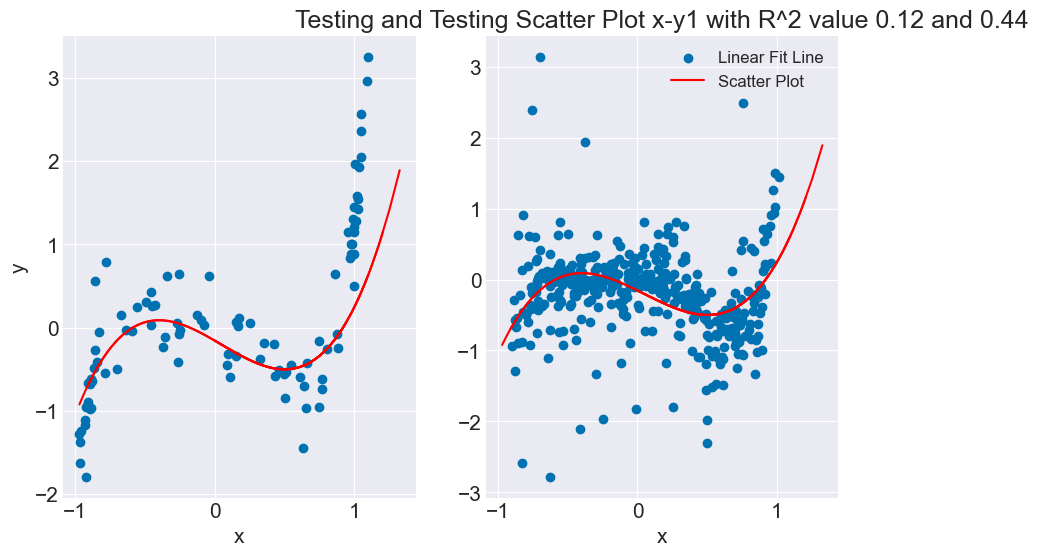

In [21]:
fig, axs = plt.subplots(1, 2)
line1 = c[0] + c[1] * lineM_x + c[2] * lineM_x**2 + c[3] * lineM_x**3
axs[0].scatter(data1[:,0], data1[:,1])
axs[0].plot(lineM_x, line1, 'r')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")



axs[1].scatter(data4[:,0], data4[:,1])
axs[1].plot(lineM_x, line1, 'r')
axs[1].set_xlabel("x")
plt.title(f"Testing and Testing Scatter Plot x-y1 with R^2 value {r2:0.2f} and {R2:0.2f}")
plt.legend(('Linear Fit Line', 'Scatter Plot'), fontsize = 12)
plt.show()